In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
13,1100,2,40.0
16,1180,3,48.0
5,1170,2,38.0
4,1200,2,51.0
12,1000,2,38.0


In [3]:
df.describe()

,area,bedrooms,price
count,20.000000,20.000000,20.000000
mean,1821.450000,2.900000,78.853500
std,864.615794,0.967906,43.761901
min,800.000000,1.000000,32.000000
25%,1173.750000,2.000000,41.500000
50%,1480.500000,3.000000,61.000000
75%,2633.000000,3.250000,106.500000
max,3700.000000,5.000000,167.000000


In [4]:
X = df.drop('price', axis=1).values
Y = df.price.values.reshape(df.shape[0],1) # ma trận (20x1)
X.shape, Y.shape

((20, 2), (20, 1))

In [5]:
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
Y_scaled = scalerY.fit_transform(Y)

In [6]:
random_indices = np.random.choice(X.shape[0], size=5, replace=False)
randXs = X_scaled[random_indices]
randYs = Y_scaled[random_indices]
random_indices, randXs, randYs

(array([10,  8,  5, 13,  7]),
 array([[0.34482759, 0.5       ],
        [0.17586207, 0.5       ],
        [0.12758621, 0.25      ],
        [0.10344828, 0.25      ],
        [0.86206897, 0.75      ]]),
 array([[0.37037037],
        [0.13333333],
        [0.04444444],
        [0.05925926],
        [0.91111111]]))

# Mini-Batch Gradien Descent

In [7]:
def miniBatch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    features = X.shape[1]  # 2
    samples = X.shape[0]  # 20
    
    w = np.ones(shape=(features, 1))  # matrix (2x1)
    bias = 0
    
    list_loss = []
    list_epoch = []

    for i in range(epochs):
        size_of_batch = 5
        rand_indices = np.random.choice(X.shape[0], size=size_of_batch, replace=False)
        rand_Xs = X[rand_indices].reshape(size_of_batch, -1)  # matrix (5x2)
        rand_Ys = y_true[rand_indices].reshape(size_of_batch, -1)  # matrix (5x1)
        
        weighted_sum = (rand_Xs @ w) + bias # (5x2) @ (2x1) + 1 số = (5x1)
        rand_Ys_pred = weighted_sum
        
        loss = np.mean(np.square(rand_Ys - rand_Ys_pred))
        
        if i % 5 == 0:
            list_loss.append(loss)
            list_epoch.append(i)
        
        d_w = (-2/size_of_batch) * (rand_Xs.T @ (rand_Ys - rand_Ys_pred))  # 1 số * (2x5) @ (5x1) = (2x1)
        d_bias = (-2/size_of_batch) * np.sum(rand_Ys - rand_Ys_pred)
        
        w = w - learning_rate * d_w  # return (2x1)
        bias = bias - learning_rate * d_bias
    
    return w, bias, loss, list_loss, list_epoch

In [8]:
w, bias, loss, list_loss, list_epoch = miniBatch_gradient_descent(X_scaled, Y_scaled, 2000)
loss

0.002833230198981978

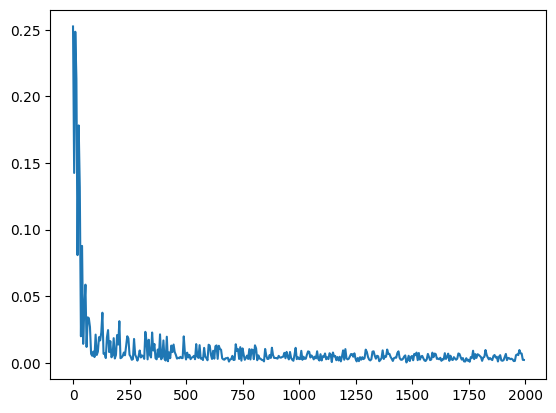

In [9]:
plt.plot(list_epoch, list_loss)

### Predict

In [10]:
w, bias

(array([[0.67237287],
        [0.53529317]]),
 -0.14777257698872592)

In [11]:
def predict(X, w, bias):
    weighted_sum = X @ w + bias
    y_pred = weighted_sum
    return y_pred

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, train_size=0.7, random_state=1)

In [13]:
yp_test = predict(X_test,w,bias)

In [14]:
scalerY.inverse_transform(yp_test)

array([[ 70.75037491],
       [ 60.0770352 ],
       [126.72096036],
       [ 79.4831074 ],
       [ 68.21506548],
       [ 93.56815981]])

In [15]:
scalerY.inverse_transform(y_test)

array([[ 75.],
       [ 48.],
       [135.],
       [ 82.],
       [ 62.],
       [101.]])